# Miniproyecto 2

### Juan Lorthiois

### Elder Guzman

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from math import log
import random
import math

### Codigo - Ejercicio 1

In [17]:
def f1(punto): return (punto[0]/2,punto[1]/2)

In [18]:
def f2(punto): return (punto[0]/2+0.5,punto[1]/2)

In [19]:
def f3(punto): return (punto[0]/2+0.25,punto[1]/2+0.5)

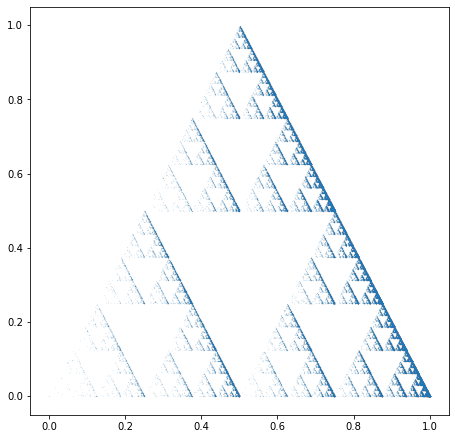

In [32]:
num_puntos = 100000
pesos = [np.random.randint(100),np.random.randint(100),np.random.randint(100)]
#pesos = [1,1,1]
puntos = [(0,0)]
func = random.choices([0,1,2], weights=pesos, k=num_puntos)
for i in range(num_puntos):
    p = puntos[i]
    f = func[i]
    if f == 0:
        puntos.append(f1(p))
    elif f == 1:
        puntos.append(f2(p))
    elif f == 2:
        puntos.append(f3(p))


plt.scatter(*zip(*puntos),s=0.001)
plt.gcf().set_size_inches((7.5,7.5))
#plt.savefig("Ejer1" + "-"+"25")
plt.show()

### Codigo - Ejercicio 2

In [23]:
def F1(x, y): return x*0.85 + y*0.04 + 0.0, x*-0.04 + y*0.85 + 1.6
def F2(x, y): return -0.15*x + 0.28*y + 0.0, x*0.26 + y*0.24 + 0.44
def F3(x, y): return x*0.2 + y*-0.26 + 0.0, x*0.23 + y*0.22 + 1.6
def F4(x, y): return x*0.0 + y*0.0, x*0.0 + y*0.16

In [24]:
def Framework4(P,n):
    num_puntos = n
    pesos = P
    puntos = [(0,0)]
    func = random.choices([0,1,2,3], weights=pesos, k=num_puntos)
    for i in range(num_puntos):
        p = puntos[i]
        f = func[i]
        if f == 0:
            puntos.append(F1(p[0],p[1]))
        elif f == 1:
            puntos.append(F2(p[0],p[1]))
        elif f == 2:
            puntos.append(F3(p[0],p[1]))
        elif f == 3:
            puntos.append(F4(p[0],p[1]))


    plt.scatter(*zip(*puntos),s=0.001)
    plt.gcf().set_size_inches((7.5,7.5))
    #plt.savefig("Ejer2")
    plt.show()

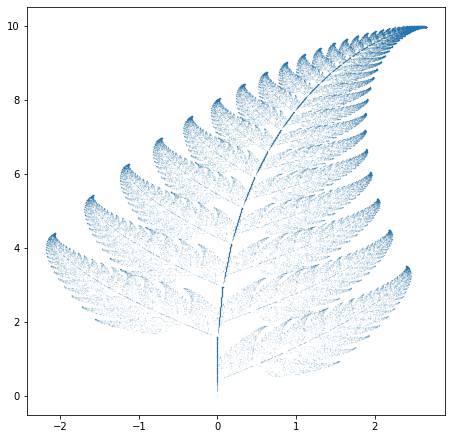

In [25]:
Framework4([0.85, 0.07, 0.07, 0.01],100000)

### Codigo - Ejercicio 3

In [12]:
class Ejer3:
    
    def __init__(self,seed=None):
        if seed:
            self.xn1 = seed
            self.xn2 = seed
        else:
            import datetime
            system_time = datetime.datetime.now()
            self.xn1 = system_time.hour*system_time.minute**system_time.second*system_time.year*system_time.day*system_time.month
            self.xn2 = self.xn1

    
    def gen1(self):
        x = 5**5 * self.xn1
        mod = 2**35 - 1
        self.xn1 = x%mod
        x = self.xn1/mod
        return x
    
    def gen2(self):
        x = 7**5 * self.xn2
        mod = 2**31 - 1
        self.xn2 = x%mod
        x = self.xn2/mod
        return x

In [13]:
def astericHistogram(data):
    cou = [0]*10
    
    for i in range( len(data) ):
        for j in range(1,11):
            if (j-1)/10 <= data[i] and data[i] < j/10:
                cou[j-1] += 1

    for i in range( 10 ):
        rango = "De " + str(i/10) + " a " + str( (i+1)/10 ) + ": "
        
        porcentaje = np.round(cou[i]/len(data) * 100,2)
        num_ateriscos = math.ceil(porcentaje*4)
        
        rango += '*'*(num_ateriscos)
        rango = rango.ljust(100)
        rango +=  "(" + str(cou[i])+"," + str( porcentaje ) +"% )"
        print(rango)
    return


In [14]:
generator = Ejer3()

In [34]:
generado1 = []
generado2 = []
generado3 = []
for i in range(100):
    generado1.append( generator.gen1() )
    generado2.append( generator.gen2() )
    generado3.append( np.random.rand() )


print("Generador 1 - 100".center(100))
astericHistogram(generado1)
print("Generador 2 - 100".center(100))
astericHistogram(generado2)
print("Generador default - 100".center(100))
astericHistogram(generado3) 

                                         Generador 1 - 100                                          
De 0.0 a 0.1: ****************************************************                                  (13,13.0% )
De 0.1 a 0.2: ****************************                                                          (7,7.0% )
De 0.2 a 0.3: ************************                                                              (6,6.0% )
De 0.3 a 0.4: ****************************************************                                  (13,13.0% )
De 0.4 a 0.5: ********************************************************                              (14,14.0% )
De 0.5 a 0.6: ************************************                                                  (9,9.0% )
De 0.6 a 0.7: ************************************                                                  (9,9.0% )
De 0.7 a 0.8: ********************************                                                      (8,8.0% )
De 0.8 a 0.9:

### Codigo - Ejercicio 4

In [5]:
#definimos la funcion correspondiente a la que se debe integrar en el intervao [0,1]

def func_4(y):
    
    a = np.exp(-np.tan(np.pi*(y-(1/2)))**2)*(1/(np.cos(np.pi*(y-(1/2)))))**2*np.pi
    return a

In [6]:
def Montecarlo_func4(k):
    
    #generamos la lista de valores aleatorios
    U_1 = [random.random() for i in range(0, k)]
    
    F_eval = []
    
    #evaluamos la funcion en cada una de los valores aleaotorios del intervalo 0,1
    for i in range(0,k):
        F_eval.append(func_4(U_1[i]))
    
    
    return np.sum(F_eval)/k

In [7]:
Montecarlo_func4(100)  # 100 iteraciones

1.8978488958604651

In [8]:
Montecarlo_func4(10000)  # 10,000 iteraciones

1.7677053218817416

In [9]:
Montecarlo_func4(100000)  # 100,000 iteraciones

1.7718690810779631

### Codigo - Ejercicio 5

In [10]:
#Definimos la funcion a integrar con los limites de integracion y las sutituciones apropiadas


def func_5(h,p):
    
    if h < p:
        a = np.exp(-(np.tan(np.pi/2 * p) + np.tan(np.pi/2 * h) ))*(np.pi**2/4)*(1/np.cos(np.pi/2 * h))**2 * (1/np.cos(np.pi/2 * p))**2
        return a
    else:
        return 0
    

In [11]:
#Definimos el proceso de Montecarlo que se aplicara a la funcion de 2 variables


def Montecarlo_2Vars_func5(k):
    
    #generamos las listas de valores aleatorios distribuciones uniformes
    U_1 = [random.random() for i in range(0, k)]
    U_2 = [random.random() for i in range(0, k)]
    
    F_eval = []  
    
    #evaluamos la funcion en cada una de los valores aleaotorios del intervalo 0,1
    for i in range(0,k):
        F_eval.append(func_5(U_1[i], U_2[i]))
    
    
    return np.sum(F_eval)/k

In [12]:
Montecarlo_2Vars_func5(100)  #100 iteraciones

0.5262902644654889

In [13]:
Montecarlo_2Vars_func5(1000)  #10,000 iteraciones

0.484928897898684

In [14]:
Montecarlo_2Vars_func5(100000)  #100,000 iteraciones

0.4996748902761426